# train.csv and test.csv

- price\_doc: sale price (this is the target variable)
- id: transaction id
- timestamp: date of transaction
- full\_sq: total area in square meters, including loggias, balconies and other non-residential areas
- life\_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
- floor: for apartments, floor of the building
- max\_floor: number of floors in the building
- material: wall material
- build\_year: year built
- num\_room: number of living rooms
- kitch\_sq: kitchen area
- state: apartment condition
- product\_type: owner-occupier purchase or investment
- sub\_area: name of the district

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import scipy
from collections import defaultdict

/Users/pedrojesus/anaconda/envs/py3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pd.set_option("display.max_rows",30)
pd.set_option("display.max_columns",10)

In [3]:
train_df = pd.read_csv("train.csv")

In [52]:
def print_correlation_matrix(df):
    #print correlation matrix
    f, ax = plt.subplots(figsize=(20, 20))
    corr = df.corr()
    sns.heatmap(corr, square=True, ax=ax)
    
def print_top_correlation_indices(df): 
    #print highest correlated variables
    corr = df.corr()
    corr.loc[:,:] = np.tril(corr.values, k=-1) #lower triangular
    sorted_corr = corr.abs().unstack().sort_values(ascending = False)

    pd.set_option("display.max_rows",500)
    print(sorted_corr[sorted_corr > 0.8])

# House Variables

## price_doc

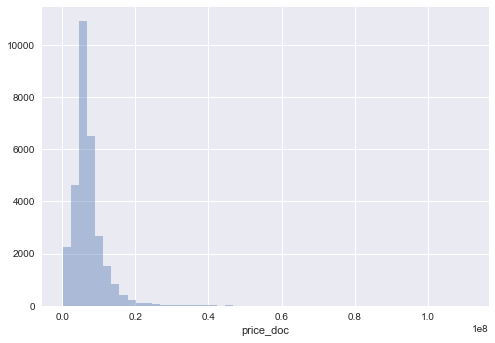

In [9]:
sns.distplot(train_df['price_doc'], kde=False)

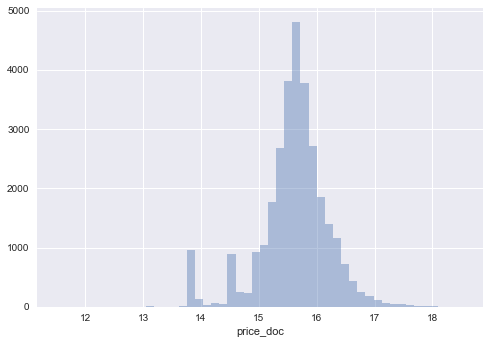

In [10]:
sns.distplot(np.log(train_df['price_doc']), kde=False)

**Perform logarithm!**

## full_sq

In [11]:
train_df['full_sq'].describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [12]:
train_df['full_sq'].sort_values(ascending = False)

3527     5326
2780      729
22785     637
18341     634
5944      634
23715     603
7207      461
2425      412
27793     407
1610      394
3596      388
1478      353
128       325
16743     303
1307      291
         ... 
16738       1
25887       1
23048       1
24892       1
27154       1
26582       1
22871       1
22795       1
22171       1
17194       1
22722       1
26925       1
23573       1
24296       0
17932       0
Name: full_sq, dtype: int64

5326 is cleary an outlier, so remove it

In [13]:
train_df = train_df[train_df['full_sq'] != 5326.000000]

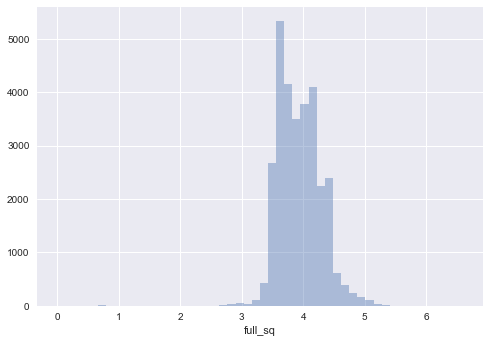

In [16]:
sns.distplot(train_df['full_sq'], kde=False);

## life_sq

In [17]:
train_df['life_sq'].describe()

count    24087.000000
mean        34.403786
std         52.286758
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [18]:
train_df['life_sq'].sort_values(ascending = False)

13546    7478.0
9646      802.0
22785     637.0
9256      458.0
26342     435.0
4385      426.0
27793     407.0
21080     349.0
128       325.0
9237      301.0
1084      281.0
13629     259.0
18525     232.0
18669     209.0
1029      197.0
          ...  
30425       NaN
30426       NaN
30428       NaN
30429       NaN
30430       NaN
30439       NaN
30443       NaN
30444       NaN
30447       NaN
30448       NaN
30450       NaN
30451       NaN
30459       NaN
30465       NaN
30468       NaN
Name: life_sq, dtype: float64

In [19]:
train_df = train_df[train_df['life_sq'] != 7478.0]

## floor

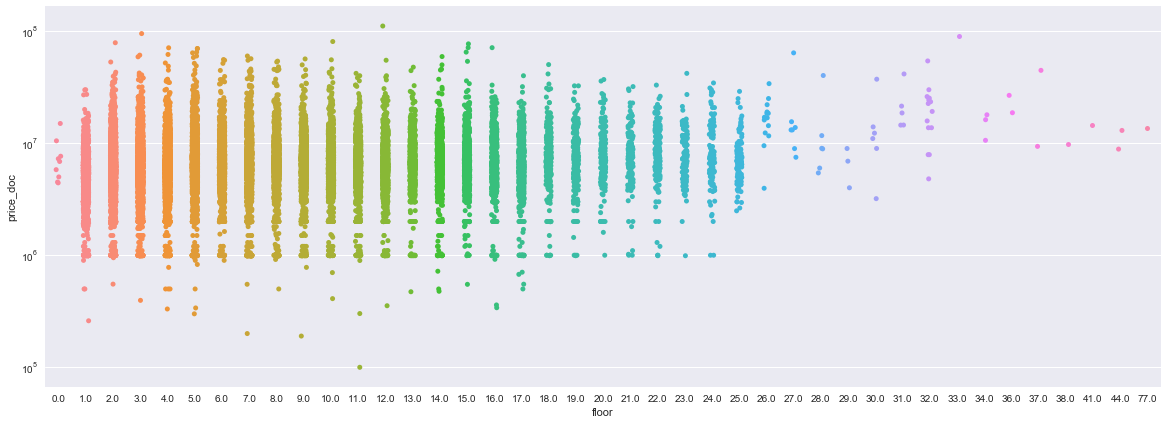

In [23]:
f, ax = plt.subplots(figsize=(20, 7))
ax.set(yscale="log")
sns.stripplot(x="floor", y="price_doc", data=train_df, jitter=True, ax = ax);

In [24]:
(train_df['floor'] > 25).value_counts()

False    30401
True        68
Name: floor, dtype: int64

Over 25 there aren't many occurences, we shall cut there.

## max floor

In [25]:
train_df['max_floor'].value_counts(dropna=False)

NaN       9571
 17.0     4671
 9.0      3025
 5.0      2267
 12.0     2229
 14.0     1362
 16.0     1146
 1.0       973
 22.0      745
 25.0      735
 0.0       550
 24.0      396
 8.0       307
 10.0      284
 3.0       278
          ... 
 29.0        6
 39.0        4
 34.0        3
 33.0        3
 31.0        3
 99.0        3
 45.0        2
 47.0        2
 36.0        2
 57.0        1
 117.0       1
 42.0        1
 44.0        1
 41.0        1
 38.0        1
Name: max_floor, dtype: int64

Create variable for top floor and that's it!

## material

In [27]:
train_df['material'].value_counts(dropna = False)

 1.0    14196
NaN      9571
 2.0     2993
 5.0     1561
 4.0     1344
 6.0      803
 3.0        1
Name: material, dtype: int64

Looks like material is a category

## build_year

In [28]:
train_df['build_year'].value_counts(dropna = False)

NaN            13604
 2014.0          918
 2015.0          824
 0.0             530
 2013.0          464
 1970.0          418
 1969.0          407
 1968.0          389
 1967.0          384
 1965.0          378
 2016.0          375
 1.0             368
 1972.0          360
 1974.0          357
 1971.0          352
               ...  
 1691.0            1
 1906.0            1
 20.0              1
 71.0              1
 1925.0            1
 1911.0            1
 4965.0            1
 1905.0            1
 1948.0            1
 20052009.0        1
 1886.0            1
 1895.0            1
 215.0             1
 2018.0            1
 1876.0            1
Name: build_year, dtype: int64

Values smaller than 1800 and bigger than 2016 makes no sense. So it is better to make all these values NA instead of wrong values.

In [ ]:
def correct_year(year):
    if year < 1800:
        return np.nan
    if year > 2016:
        return np.nan
    else:
        return year
    
#train_df['build_year'] = train_df['build_year'].apply(correct_year, 1)

## num_room

In [29]:
train_df['num_room'].value_counts(dropna = False)

NaN      9571
 2.0     8132
 1.0     7602
 3.0     4674
 4.0      418
 5.0       40
 0.0       14
 6.0        9
 8.0        3
 10.0       2
 7.0        1
 19.0       1
 9.0        1
 17.0       1
Name: num_room, dtype: int64

## kitch_sq

In [30]:
train_df['kitch_sq'].value_counts(dropna = False)

NaN        9571
 1.0       4853
 8.0       2678
 5.0       2594
 6.0       2298
 10.0      2241
 9.0       1806
 0.0       1381
 7.0       1262
 12.0       552
 11.0       478
 13.0       153
 14.0       112
 4.0         87
 15.0        67
           ... 
 27.0         1
 96.0         1
 35.0         1
 75.0         1
 53.0         1
 2013.0       1
 86.0         1
 79.0         1
 73.0         1
 26.0         1
 36.0         1
 65.0         1
 97.0         1
 620.0        1
 78.0         1
Name: kitch_sq, dtype: int64

Kitch_sq bigger than full_sq + life_sq makes no sense (assuming these two are distinct, which are not)

In [ ]:
#query = train_df['kitch_sq'] > train_df['life_sq'] + train_df['full_sq']
#train_df.ix[query, 'kitch_sq'] = np.nan

## State

In [31]:
train_df['state'].value_counts(dropna=False)

NaN      13558
 2.0      5844
 3.0      5790
 1.0      4854
 4.0       422
 33.0        1
Name: state, dtype: int64

33.0 looks like an outlier, so just delete it.

In [33]:
train_df = train_df[train_df['state'] != 33.0]

This is a category variable

## Product_type

## sub_area

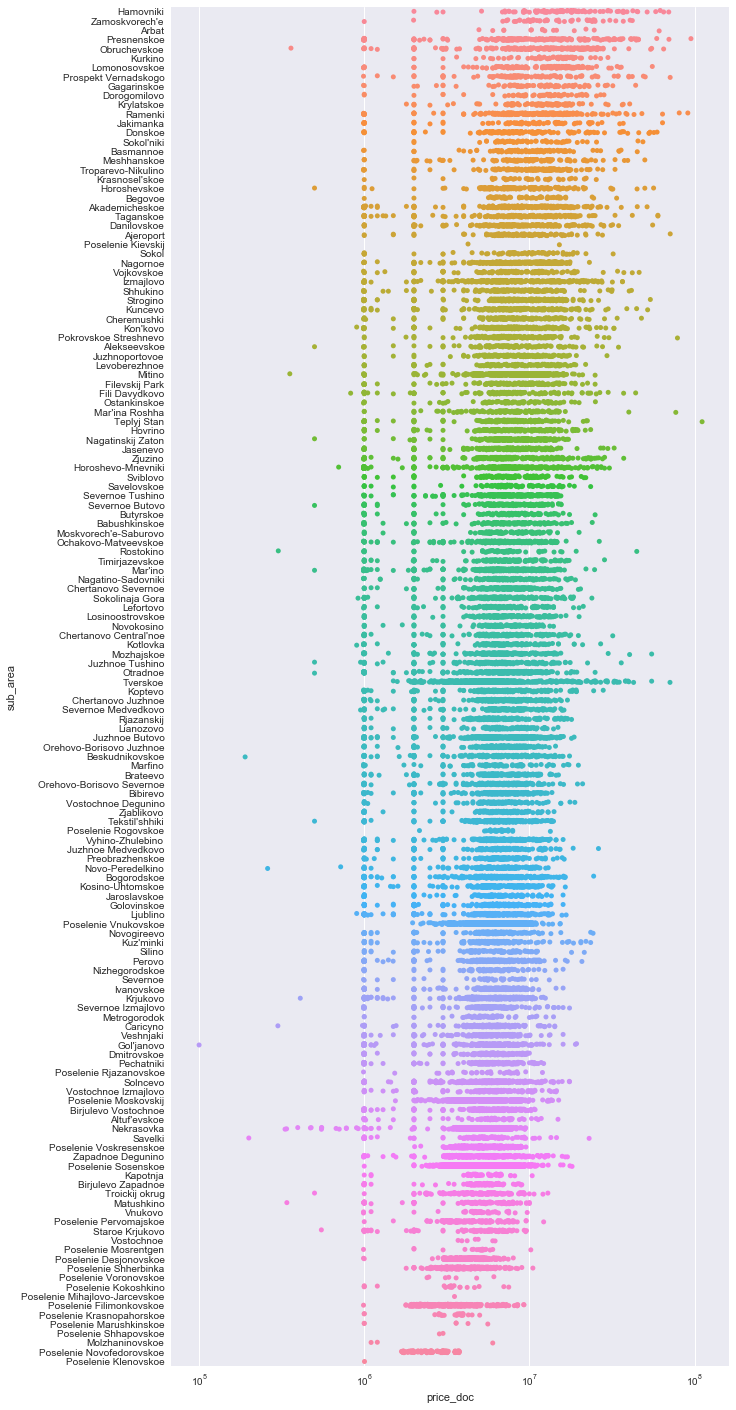

In [50]:
f, ax = plt.subplots(figsize=(10, 25))
ax.set(xscale="log")
cat_order = train_df.groupby('sub_area')['price_doc'].mean().sort_values(ascending = False).index.tolist()

g = sns.stripplot(y="sub_area", x="price_doc", data=train_df, order = cat_order, jitter=True, ax = ax);
#g.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [51]:
train_df.groupby('sub_area').size().sort_values(ascending = False)

sub_area
Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            712
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
                                  ... 
Krasnosel'skoe                      37
Poselenie Rjazanovskoe              34
Poselenie Rogovskoe                 31
Poselenie Krasnopahorskoe           27
Poselenie Kokoshkino                20
Poselenie Mosrentgen                19
Arbat                               15
Poselenie Voronovskoe                7
Vostochnoe                           7
Poselenie Marush

## Overall

In [57]:
house_columns = train_df.columns[train_df.columns.get_loc('id'):train_df.columns.get_loc('sub_area')+1].tolist() + ['price_doc'] 

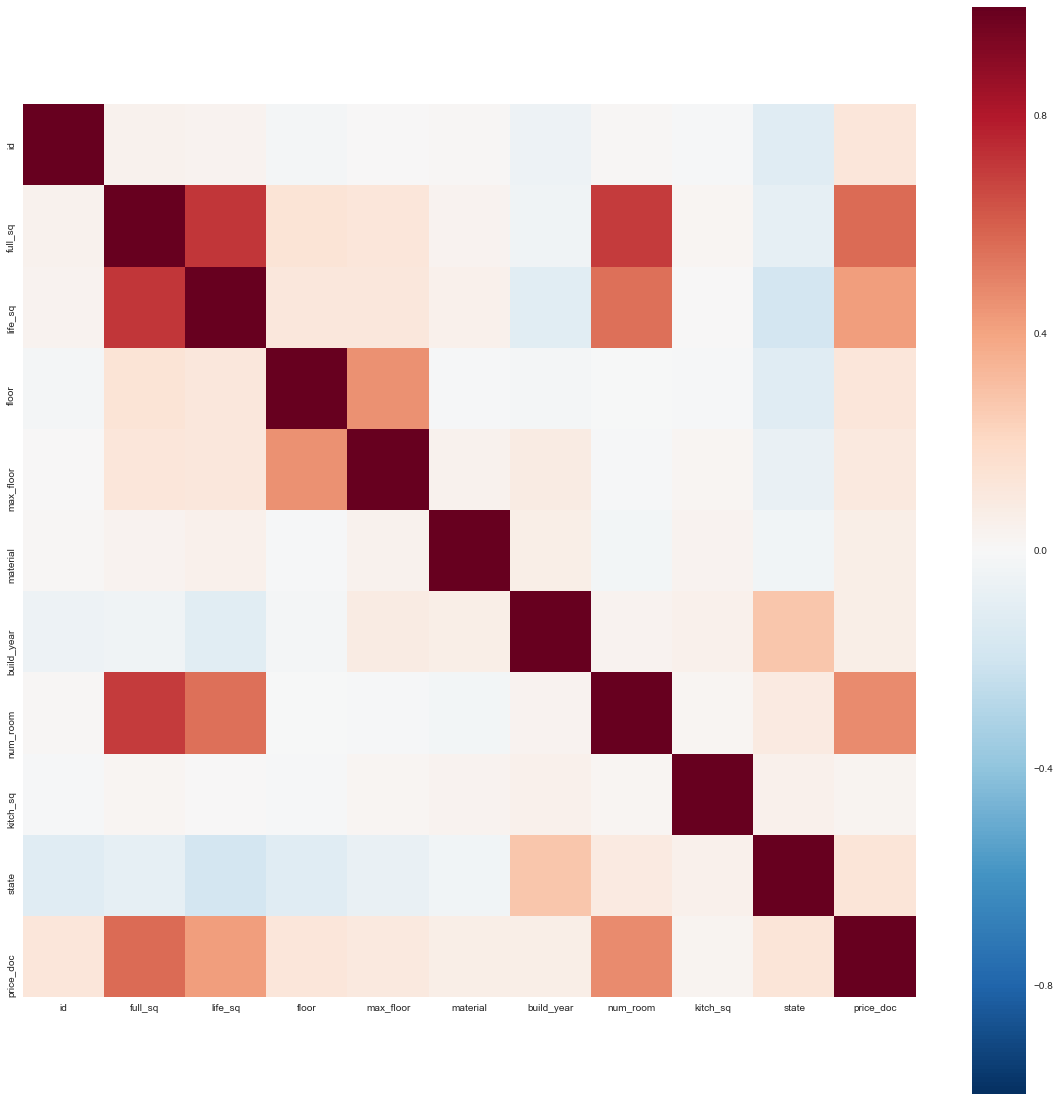

In [59]:
print_correlation_matrix(train_df[house_columns])

In [ ]:
columns_to_delete = ['max_floor']

# Imputing missing values

In [64]:
train_df = train_df[house_columns]

In [65]:
num_rows = train_df.shape[0]
non_na_count = train_df.count()
with_na = non_na_count[non_na_count != num_rows]
with_na

life_sq       24085
floor         30301
max_floor     20897
material      20897
build_year    16864
num_room      20897
kitch_sq      20897
state         16910
dtype: int64

For real valued variables the mean will be imputed. For categories the NAN will become a category